## Meteor Data - Link: https://catalog.data.gov/dataset/meteorite-landings

In [62]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
pd.set_option("display.max_rows",10)
pd.set_option("display.max_columns",None)
sns.set_style("darkgrid")

In [63]:
df = pd.read_csv("Meteorite_Landings.csv")
df.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"


In [64]:
nrows,ncols = df.shape 
print(f"# of rows: {nrows}\n# of columns: {ncols}")

# of rows: 45716
# of columns: 10


In [65]:
df.columns

Index(['name', 'id', 'nametype', 'recclass', 'mass (g)', 'fall', 'year',
       'reclat', 'reclong', 'GeoLocation'],
      dtype='object')

In [66]:
df.dtypes

name            object
id               int64
nametype        object
recclass        object
mass (g)       float64
fall            object
year           float64
reclat         float64
reclong        float64
GeoLocation     object
dtype: object

In [67]:
df.isna().sum()

name              0
id                0
nametype          0
recclass          0
mass (g)        131
fall              0
year            291
reclat         7315
reclong        7315
GeoLocation    7315
dtype: int64

In [68]:
df['nametype'].value_counts()

nametype
Valid     45641
Relict       75
Name: count, dtype: int64

In [69]:
df.drop(df[df['nametype'] == 'Relict'].index,inplace=True)

In [70]:
df.drop(columns=['nametype'],inplace=True)

In [71]:
recclass_vals = pd.DataFrame(df['recclass'].value_counts().sort_values(ascending=False))

In [72]:
top_10_classes = recclass_vals[:10]
top_10_classes

,count
recclass,
L6,8285
H5,7142
L5,4796
H6,4528
H4,4211
LL5,2766
LL6,2043
L4,1253
H4/5,428


Text(0, 0.5, 'count')

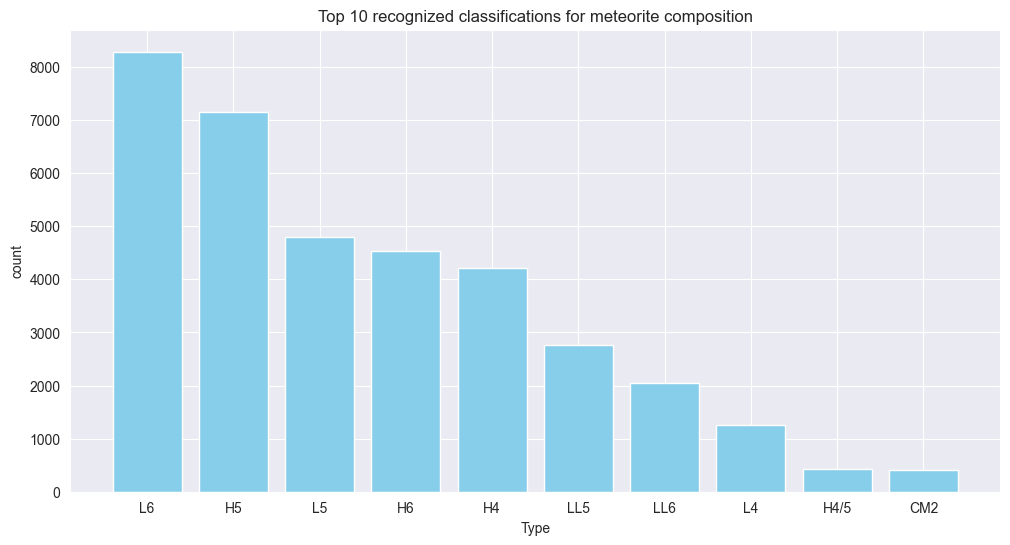

In [73]:
plt.figure(figsize=(12,6))
plt.bar(top_10_classes.index,top_10_classes['count'],color='skyblue')
plt.title("Top 10 recognized classifications for meteorite composition")
plt.xlabel("Type")
plt.ylabel("count")

In [74]:
df.set_index("id",drop=True,inplace=True)
df.head()

,name,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
id,,,,,,,,
1,Aachen,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
2,Aarhus,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
6,Abee,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
10,Acapulco,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
370,Achiras,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"


In [75]:
meteors_per_years = pd.DataFrame(df['year'].value_counts().sort_values(ascending=False))

In [76]:
top_10_years_meteors = meteors_per_years.iloc[:10]
top_10_years_meteors

,count
year,
2003.0,3321
1979.0,3045
1998.0,2693
2006.0,2453
1988.0,2296
2002.0,2072
2004.0,1937
2000.0,1781
1997.0,1691


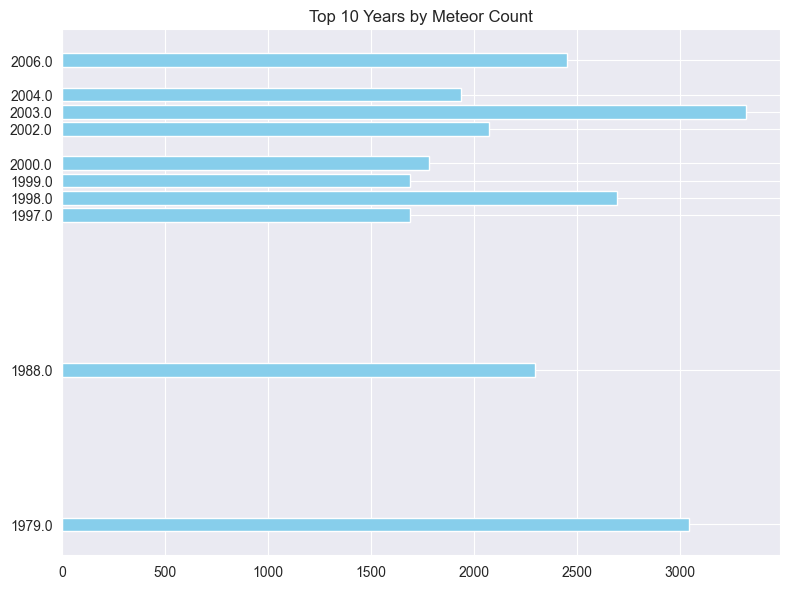

In [77]:
categories = list(top_10_years_meteors.index)
categories = [int(i) for i in categories]

plt.figure(figsize=(8, 6))
plt.barh(categories, top_10_years_meteors['count'], color='skyblue')

plt.yticks(top_10_years_meteors.index, labels=top_10_years_meteors.index)

plt.title('Top 10 Years by Meteor Count')
plt.xlabel('')
plt.ylabel('')  # Remove the y-axis label (optional)
plt.tight_layout()
plt.show()